In [1]:
import pandas as pd

# Loading dataset from csv containing 2020 2021 2022 data
file_path = 'Healthdata_final.csv'
data = pd.read_csv(file_path)


# Drop specified columns
columns_to_drop = [
    'RowId', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'Data_Value_Alt',
    'Low_Confidence_Limit', 'High_Confidence_Limit', 'Geolocation', 'ClassID', 'TopicID',
    'QuestionID', 'LocationID', 'StratificationCategory1', 'StratificationCategoryID1',
    'StratificationID1', 'StratificationCategoryID2', 'StratificationID2'
]
data = data.drop(columns=columns_to_drop, errors='ignore')
print(data.info())

# Rename columns
columns_rename = {
    'YearStart': 'Year_Start',
    'YearEnd': 'Year_End',
    'LocationAbbr': 'Location_Abbr',
    'LocationDesc': 'Location_Desc',
    'Class': 'Survey_Class',
    'Topic': 'Survey_Topic',
    'Question': 'Survey_Question',
    'Data_Value': 'Data_Value',
    'Stratification1': 'Age_Group',
    'StratificationCategory2': 'StratificationCategory2',
    'Stratification2': 'Stratification2'
}
data = data.rename(columns=columns_rename)


# Filter 1: Only_agegroup_data
only_agegroup_data = data[data['StratificationCategory2'].isnull()]

# Filter 2: Only_start2_data
only_start2_data = data[(data['StratificationCategory2'].notnull()) & (data['Age_Group'] == 'Overall')]

# Filter 3: agegroup_and_strat2_data
agegroup_and_strat2_data = data[(data['StratificationCategory2'].notnull()) & (data['Age_Group'] != 'Overall')]

# Display the resulting dataframes
print("Main Processed DataFrame:")
print(data.head())

print("\nOnly Age Group Data:")
print(only_agegroup_data.head())

print("\nOnly Stratification Category 2 Data:")
print(only_start2_data.head())

print("\nAge Group and Stratification Category 2 Data:")
print(agegroup_and_strat2_data.head())

# # Optionally save the dataframes to CSV
# data.to_csv("processed_data.csv", index=False)
# only_agegroup_data.to_csv("only_agegroup_data.csv", index=False)
# only_start2_data.to_csv("only_start2_data.csv", index=False)
# agegroup_and_strat2_data.to_csv("agegroup_and_strat2_data.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70221 entries, 0 to 70220
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                70221 non-null  int64  
 1   YearEnd                  70221 non-null  int64  
 2   LocationAbbr             70221 non-null  object 
 3   LocationDesc             70221 non-null  object 
 4   Class                    70221 non-null  object 
 5   Topic                    70221 non-null  object 
 6   Question                 70221 non-null  object 
 7   Data_Value               70221 non-null  float64
 8   Stratification1          70221 non-null  object 
 9   StratificationCategory2  56682 non-null  object 
 10  Stratification2          56682 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 5.9+ MB
None
Main Processed DataFrame:
   Year_Start  Year_End Location_Abbr Location_Desc   Survey_Class  \
0        2022      2022   

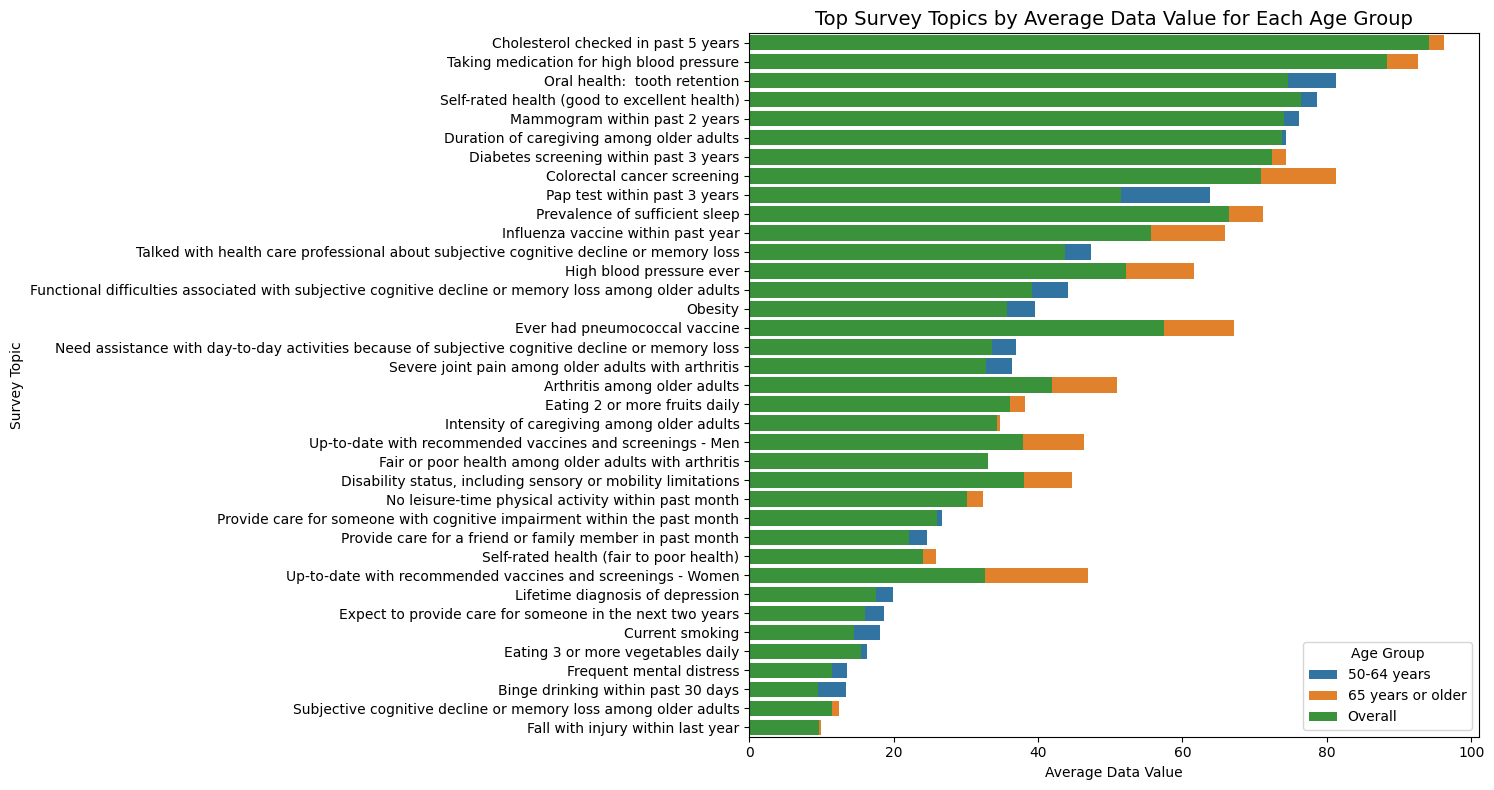

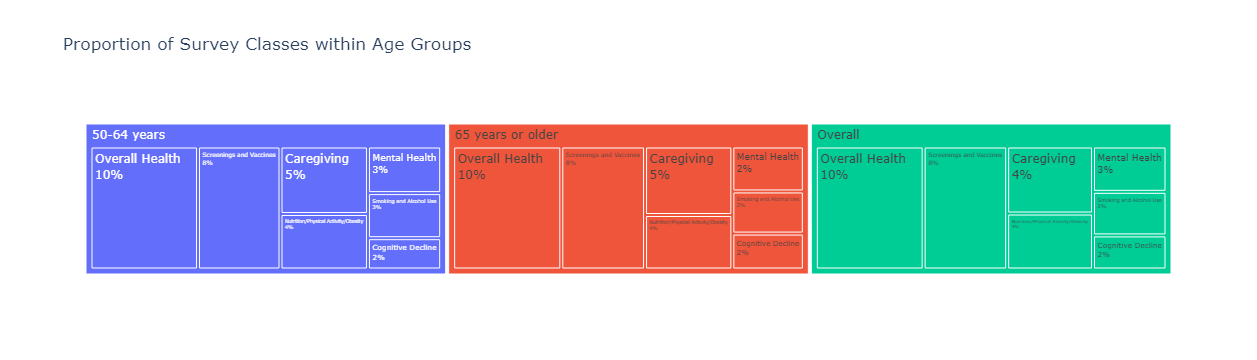

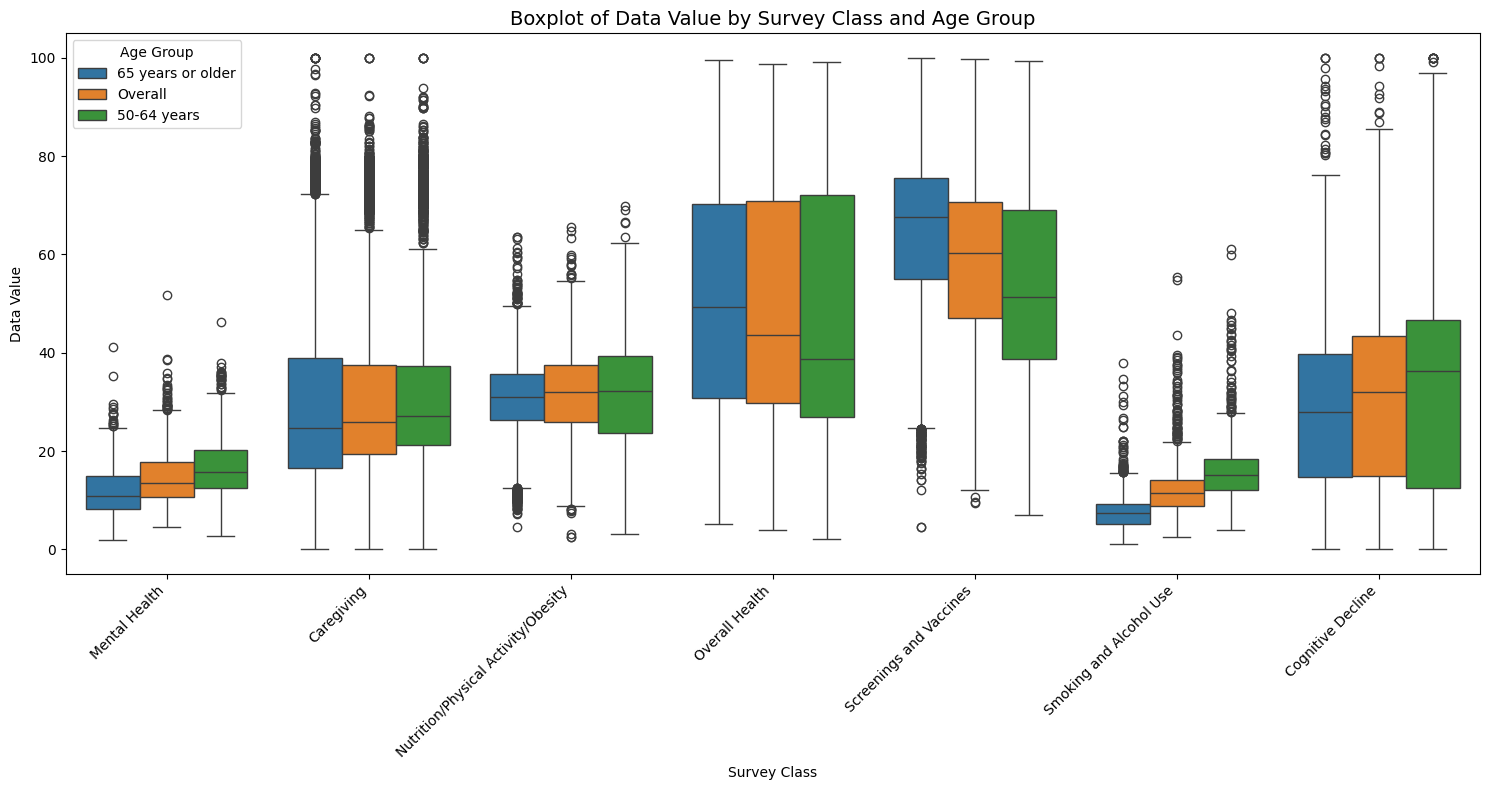

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top Survey Topics by Average Data Value for Each Age Group
top_topics = data.groupby(['Age_Group', 'Survey_Topic'])['Data_Value'].mean().reset_index()
top_topics = top_topics.sort_values(by=['Age_Group', 'Data_Value'], ascending=[True, False])

plt.figure(figsize=(15, 8))
sns.barplot(
    data=top_topics,
    x='Data_Value',
    y='Survey_Topic',
    hue='Age_Group',
    dodge=False
)
plt.title('Top Survey Topics by Average Data Value for Each Age Group', fontsize=14)
plt.xlabel('Average Data Value')
plt.ylabel('Survey Topic')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()
############################################################3

# Boxplot of Data Value by Survey Class and Age Group
plt.figure(figsize=(15, 8))
sns.boxplot(
    data=data,
    x='Survey_Class',
    y='Data_Value',
    hue='Age_Group'
)
plt.title('Boxplot of Data Value by Survey Class and Age Group', fontsize=14)
plt.xlabel('Survey Class')
plt.ylabel('Data Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show
########################################################333
import plotly.express as px

# Treemap Chart
fig = px.treemap(
    survey_class_proportions,
    path=['Age_Group', 'Survey_Class'],
    values='Proportion',
    color='Age_Group',
    title='Proportion of Survey Classes within Age Groups'
)
fig.update_traces(textinfo="label+percent entry")
fig.show()


/tmp/ipykernel_310/2668823878.py:19: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



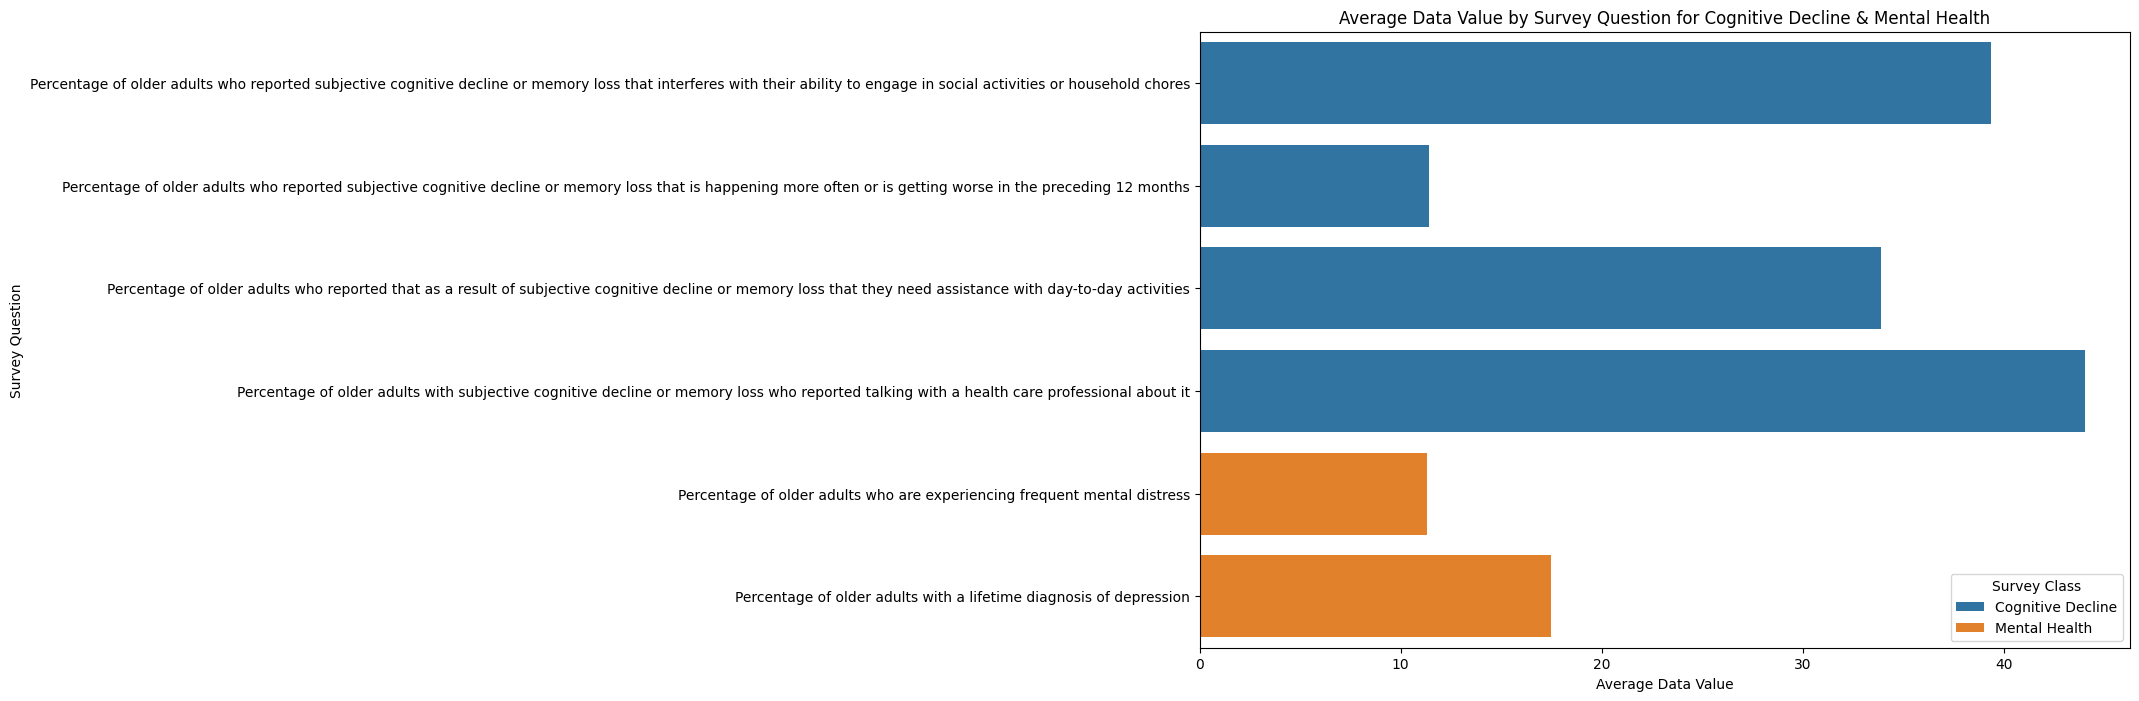

In [13]:
# Filter data for Cognitive Decline and Mental Health
filtered_data = data[data['Survey_Class'].isin(['Cognitive Decline', 'Mental Health'])]
avg_data_values = filtered_data.groupby(['Survey_Class', 'Survey_Question'])['Data_Value'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(
    data=avg_data_values,
    x='Data_Value',
    y='Survey_Question',
    hue='Survey_Class'
)
plt.title('Average Data Value by Survey Question for Cognitive Decline & Mental Health')
plt.xlabel('Average Data Value')
plt.ylabel('Survey Question')
plt.legend(title='Survey Class')
plt.tight_layout()
plt.show()

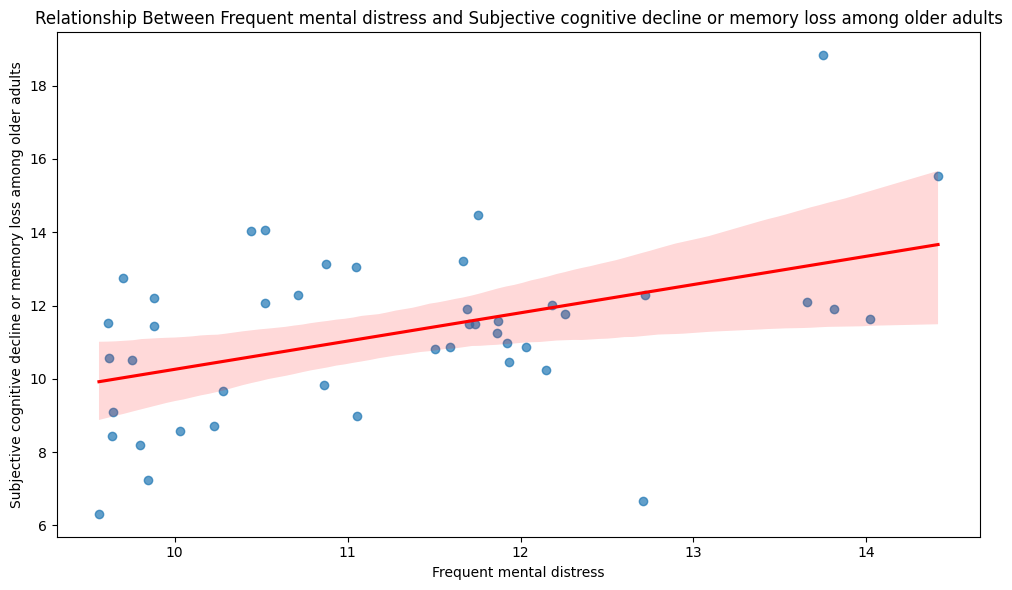

In [26]:

# Filter data for Cognitive Decline and Mental Health
related_data = data[data['Survey_Class'].isin(['Cognitive Decline', 'Mental Health'])]

# Update topic names to match dataset accurately
mental_health_topic = 'Frequent mental distress'
cognitive_decline_topic = 'Subjective cognitive decline or memory loss among older adults'

# Filter for specific related topics
related_topics_data = related_data[related_data['Survey_Topic'].isin([mental_health_topic, cognitive_decline_topic])]

# Pivot data for scatter plot
scatter_data = related_topics_data.pivot_table(
    index='Location_Desc',  # Adjust to the actual column name in your dataset
    columns='Survey_Topic',
    values='Data_Value',
    aggfunc='mean'
).dropna()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=scatter_data,
    x=mental_health_topic,
    y=cognitive_decline_topic,
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'red'}
)
plt.title(f'Relationship Between {mental_health_topic} and {cognitive_decline_topic}')
plt.xlabel(mental_health_topic)
plt.ylabel(cognitive_decline_topic)
plt.tight_layout()
plt.show()


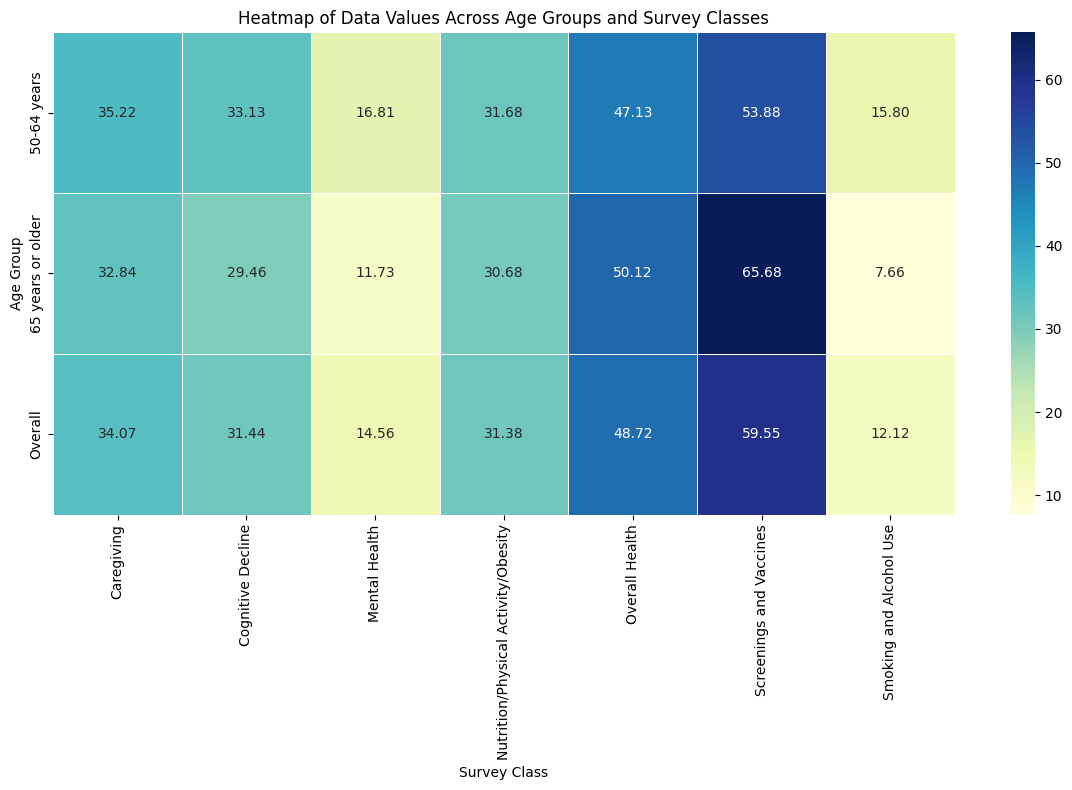

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = data.pivot_table(
    index='Age_Group',
    columns='Survey_Class',
    values='Data_Value',
    aggfunc='mean'
).fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    linewidths=0.5
)
plt.title('Heatmap of Data Values Across Age Groups and Survey Classes')
plt.xlabel('Survey Class')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

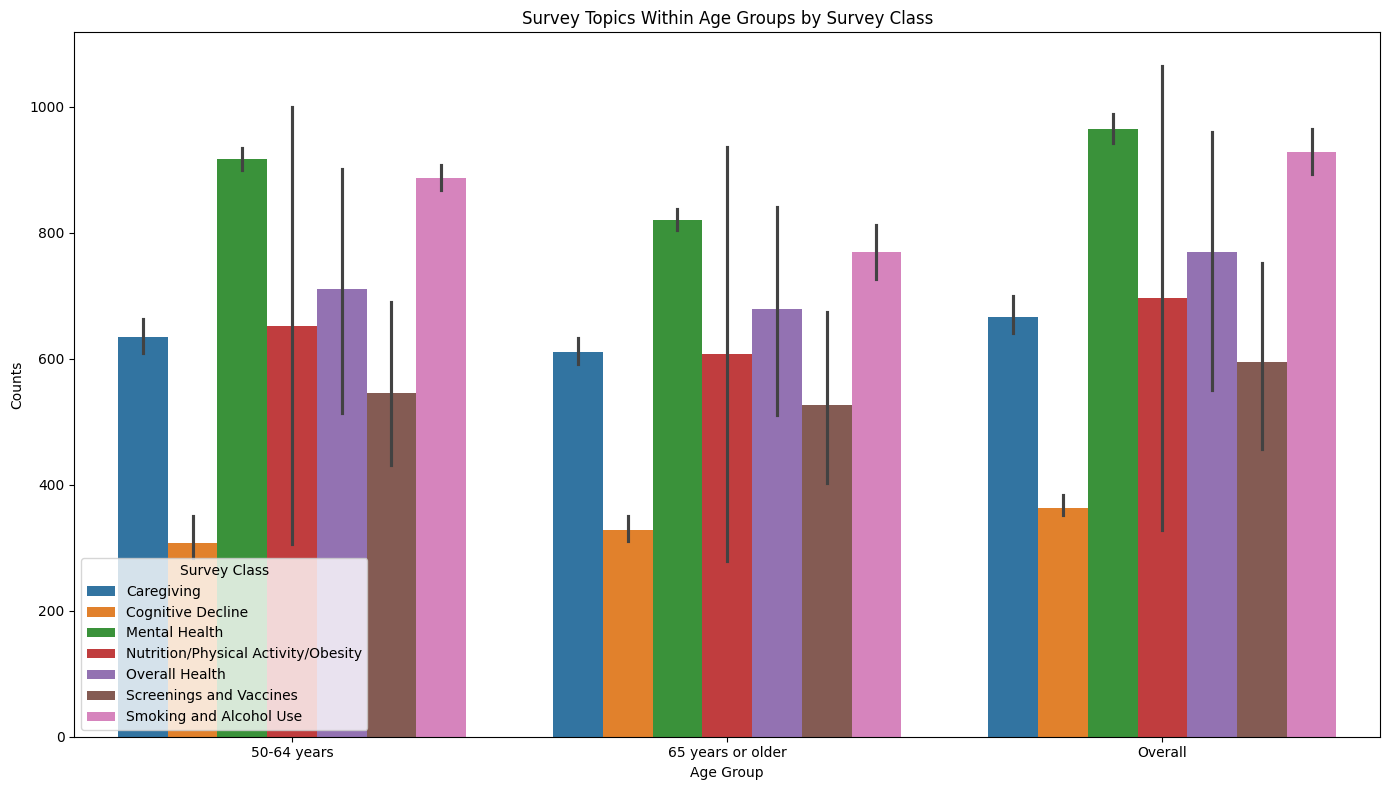

In [34]:
topic_counts = data.groupby(['Age_Group', 'Survey_Class', 'Survey_Topic']).size().reset_index(name='Counts')

plt.figure(figsize=(14, 8))
sns.barplot(
    data=topic_counts,
    x='Age_Group',
    y='Counts',
    hue='Survey_Class'
)
plt.title('Survey Topics Within Age Groups by Survey Class')
plt.xlabel('Age Group')
plt.ylabel('Counts')
plt.legend(title='Survey Class')
plt.tight_layout()
plt.show()


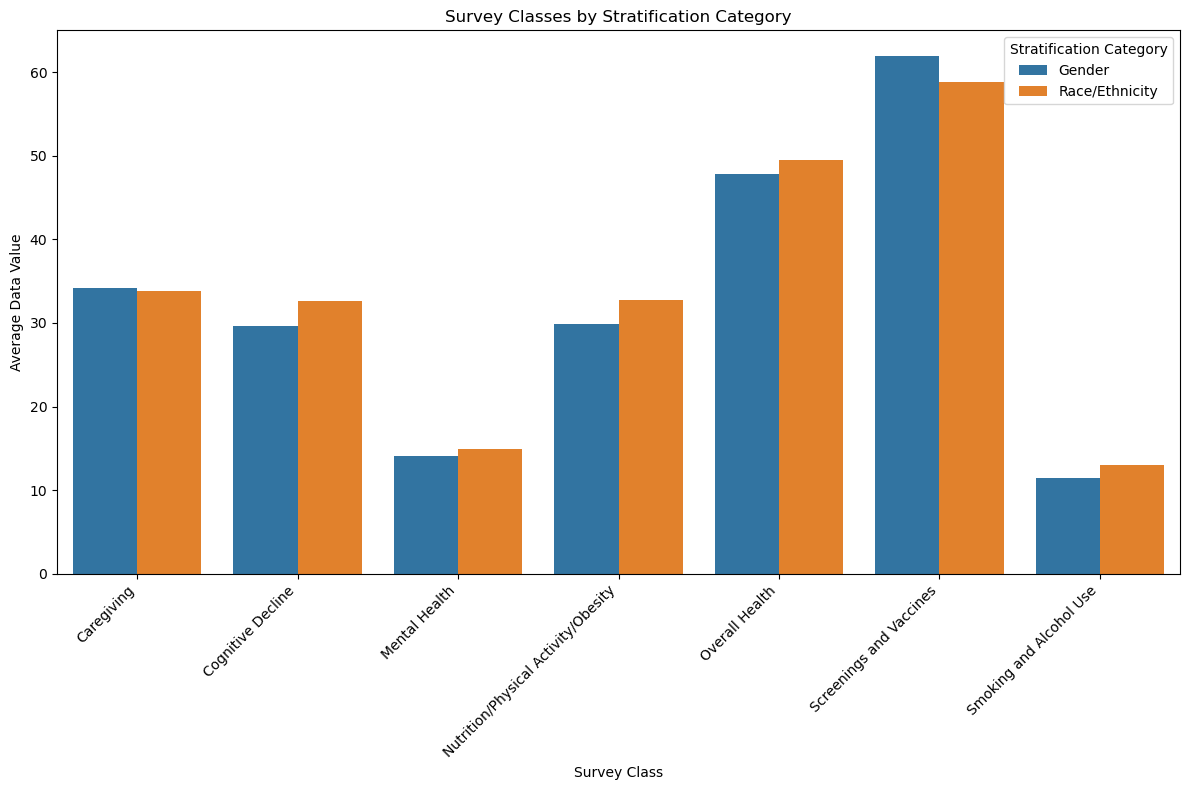

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

strat_class_data = agegroup_and_strat2_data.groupby(['Survey_Class', 'StratificationCategory2'])['Data_Value'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(
    data=strat_class_data,
    x='Survey_Class',
    y='Data_Value',
    hue='StratificationCategory2'
)
plt.title('Survey Classes by Stratification Category')
plt.xlabel('Survey Class')
plt.ylabel('Average Data Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Stratification Category')
plt.tight_layout()
plt.show()

In [10]:
# Filter data for Cognitive Decline and the three topics
topics_of_interest = [
    'Functional difficulties associated with subjective cognitive decline or memory loss among older adults',
    'Need assistance with day-to-day activities because of subjective cognitive decline or memory loss',
    'Subjective cognitive decline or memory loss among older adults'
]
filtered_data = agegroup_and_strat2_data[
    (agegroup_and_strat2_data['Survey_Class'] == 'Cognitive Decline') &
    (agegroup_and_strat2_data['Survey_Topic'].isin(topics_of_interest))
]

# Group data by Race/Ethnicity and Topic
grouped_data = filtered_data.groupby(['StratificationCategory2', 'Survey_Topic'])['Data_Value'].mean().reset_index()


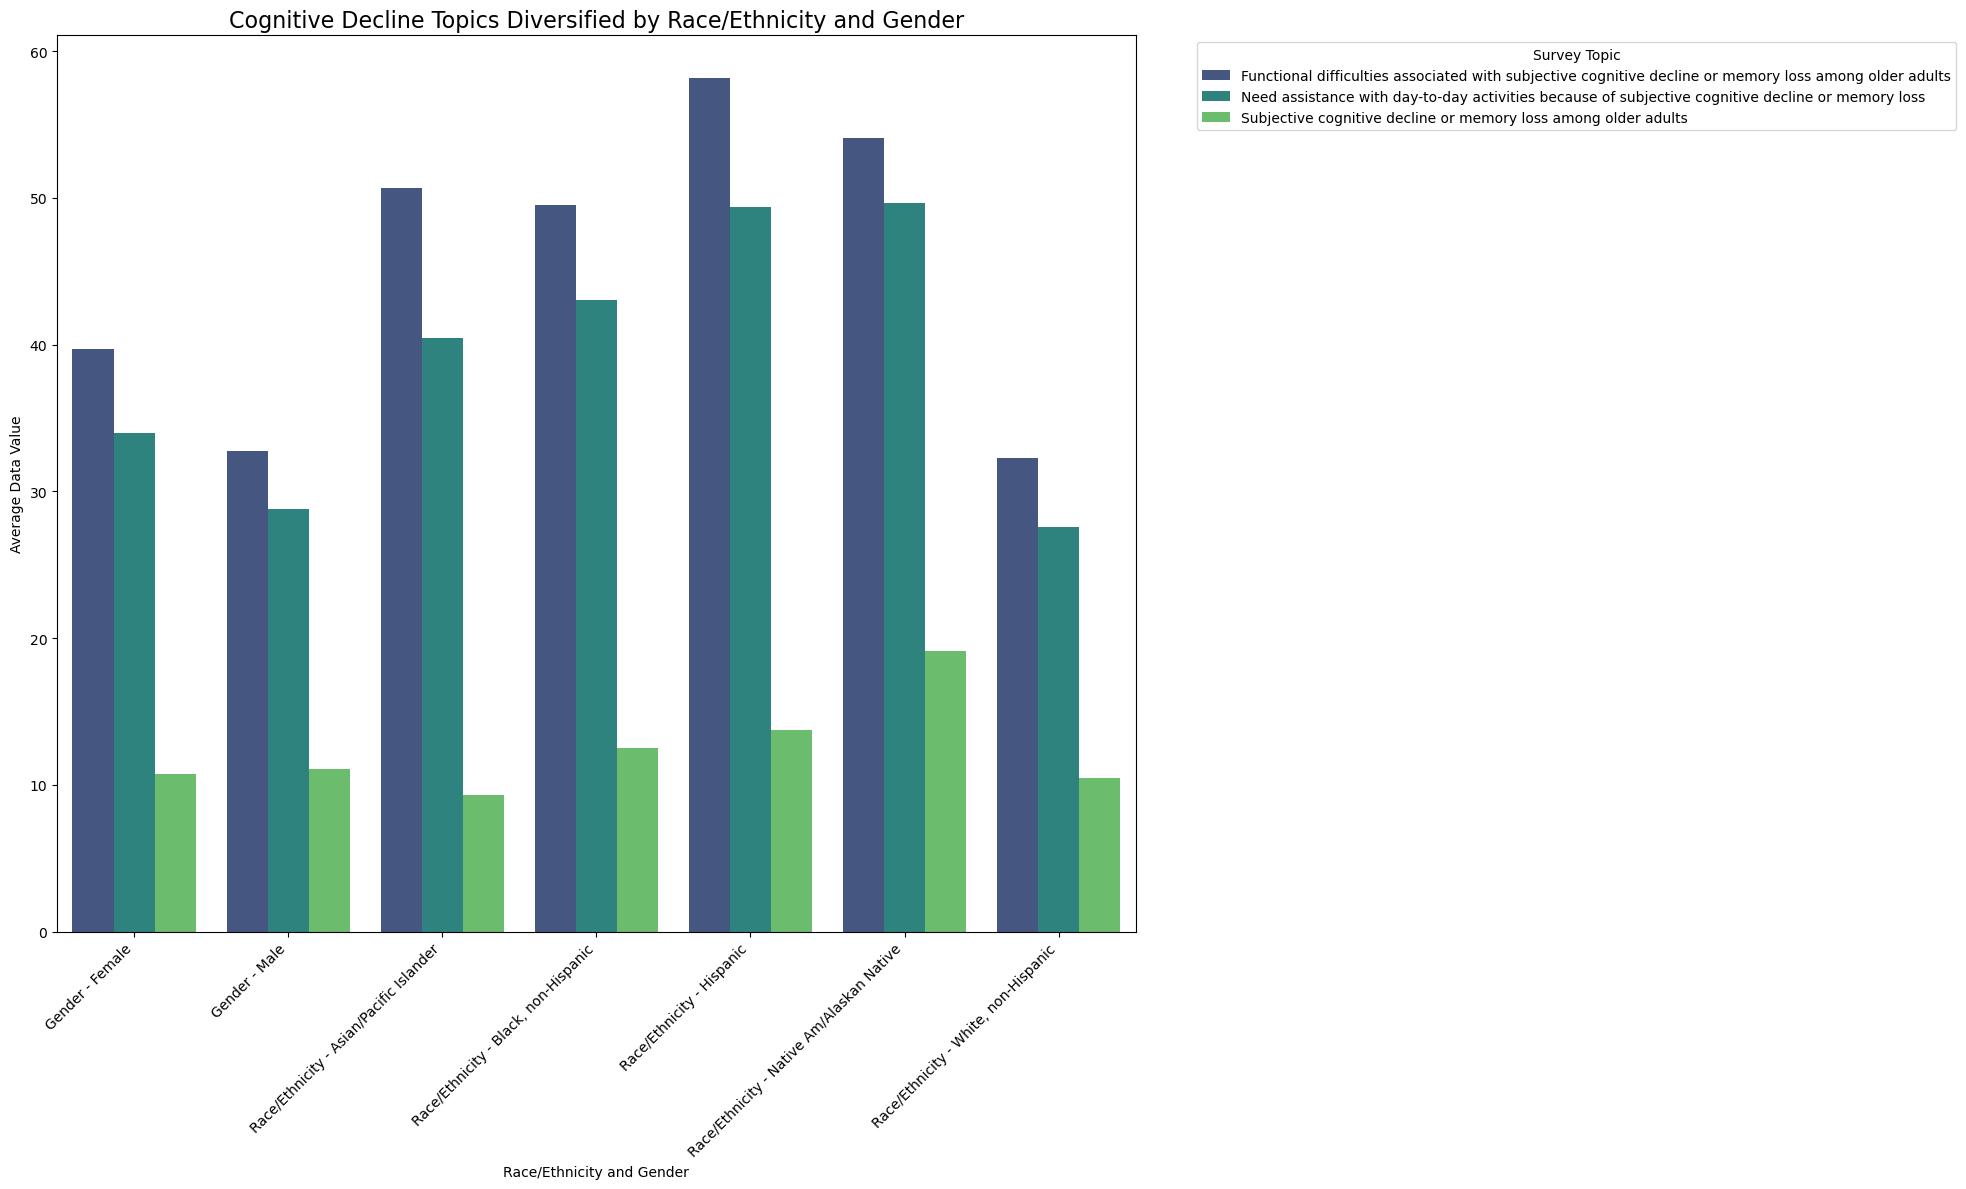

In [12]:
import matplotlib.pyplot as plt
# Filter data for Cognitive Decline and the three topics
topics_of_interest = [
    'Functional difficulties associated with subjective cognitive decline or memory loss among older adults',
    'Need assistance with day-to-day activities because of subjective cognitive decline or memory loss',
    'Subjective cognitive decline or memory loss among older adults'
]
filtered_data = agegroup_and_strat2_data[
    (agegroup_and_strat2_data['Survey_Class'] == 'Cognitive Decline') &
    (agegroup_and_strat2_data['Survey_Topic'].isin(topics_of_interest))
]

# Group data by Race/Ethnicity, Gender (or Stratification2), and Topic
grouped_data = filtered_data.groupby(['StratificationCategory2', 'Stratification2', 'Survey_Topic'])['Data_Value'].mean().reset_index()

# Combine Race/Ethnicity and Gender into a single column for visualization
grouped_data['Race_Gender'] = grouped_data['StratificationCategory2'] + ' - ' + grouped_data['Stratification2']

# Plot clustered bar chart
plt.figure(figsize=(20, 12))
sns.barplot(
    data=grouped_data,
    x='Race_Gender',
    y='Data_Value',
    hue='Survey_Topic',
    palette='viridis'
)
plt.title('Cognitive Decline Topics Diversified by Race/Ethnicity and Gender', fontsize=16)
plt.xlabel('Race/Ethnicity and Gender')
plt.ylabel('Average Data Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Survey Topic', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


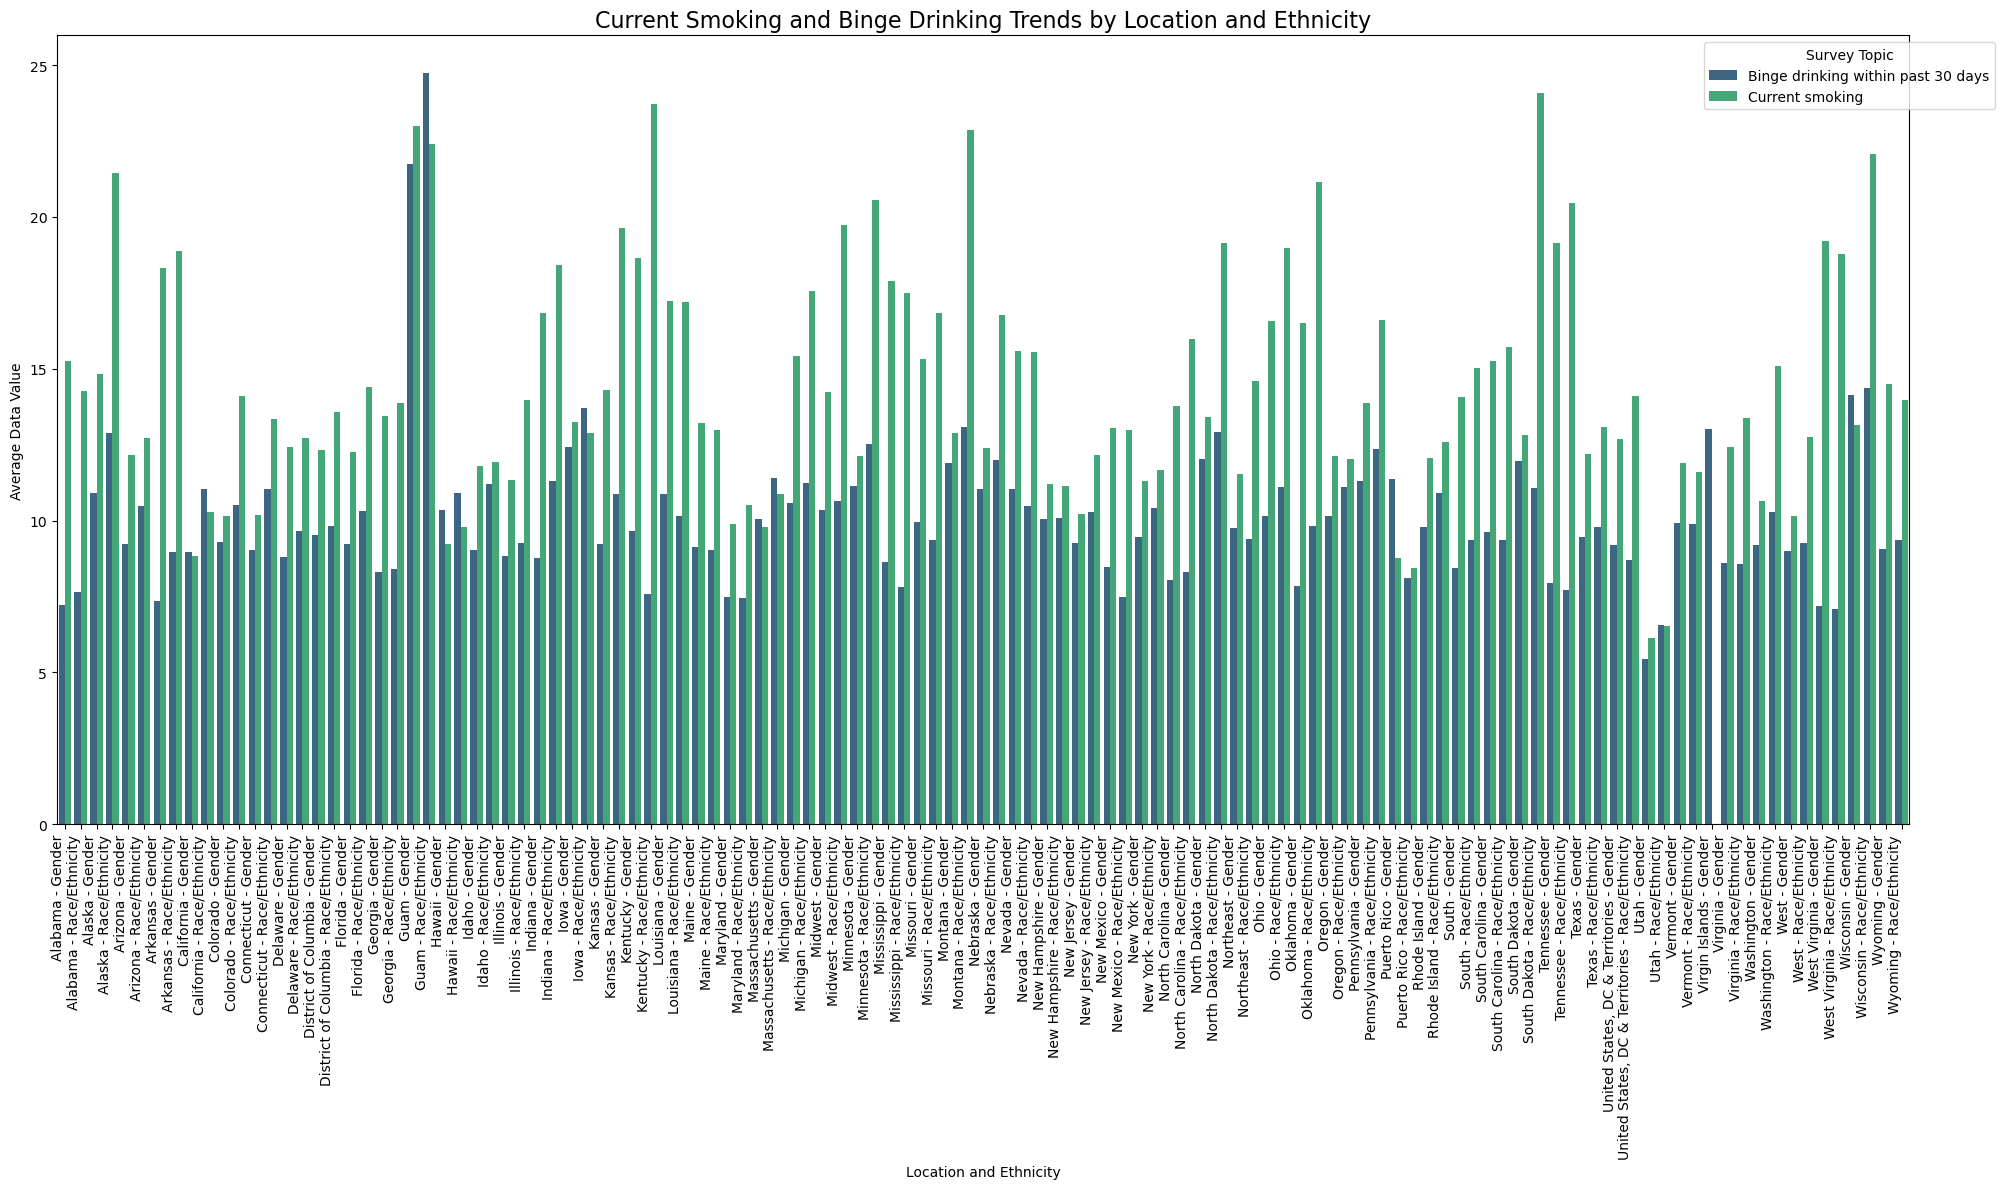

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for Smoking and Alcohol Use and the two topics
topics_of_interest = ['Current smoking', 'Binge drinking within past 30 days']
filtered_data = agegroup_and_strat2_data[
    (agegroup_and_strat2_data['Survey_Class'] == 'Smoking and Alcohol Use') &
    (agegroup_and_strat2_data['Survey_Topic'].isin(topics_of_interest))
]

# Group data by Location, Ethnicity, and Survey Topic
grouped_data = filtered_data.groupby(['Location_Desc', 'StratificationCategory2', 'Survey_Topic'])['Data_Value'].mean().reset_index()

# Combine Location and Ethnicity for visualization
grouped_data['Location_Ethnicity'] = grouped_data['Location_Desc'] + ' - ' + grouped_data['StratificationCategory2']

# Plot clustered bar chart
plt.figure(figsize=(20, 12))
sns.barplot(
    data=grouped_data,
    x='Location_Ethnicity',
    y='Data_Value',
    hue='Survey_Topic',
    palette='viridis'
)
plt.title('Current Smoking and Binge Drinking Trends by Location and Ethnicity', fontsize=16)
plt.xlabel('Location and Ethnicity')
plt.ylabel('Average Data Value')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Survey Topic', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
